In [1]:
from importlib import reload
from src import parsing
from src import model_path
from src import models_path
from src import model_goal
from src import models_goal
from src import model_interface
from src import visualization
from src import util
from src import config
reload(parsing)
reload(model_path)
reload(models_path)
reload(model_goal)
reload(models_goal)
reload(model_interface)
reload(visualization)
reload(util)
reload(config)

import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
# load input
# since we use a different file then for training we can use everything for eval
file_path = "data/medium_ab.csv"
_, eval_data, _ = parsing.parse_atc_day(file_path, train_ratio=0.02, eval_ratio=0.98)

100%|██████████| 1058/1058 [00:16<00:00, 64.27it/s] 


1058 unique ids found. Generated 247640 sequences total from 580 trajectories.
Skipped 457 trajectories.
        307 too short
        150 frequency issues (like gaps)
    
Skipped 15 sequences (0.006%) because of abnormally high absolute value after normalization
Dividing 580 human trajectories: 11 training, 569 eval, 0 test
train (3240, 40, 2) float64 (3240, 25) float32 (3240, 40, 2) float64
eval (244400, 40, 2) float64 (244400, 25) float32 (244400, 40, 2) float64


In [3]:
# load trained model
m = model_path.ModelPath(uses_goal=False)
m.load('path_simple_cnn_dropout')

[<tf.Tensor: shape=(40, 2), dtype=float32, numpy=
array([[ 0.00575618, -0.01356719],
       [ 0.00940664, -0.02606864],
       [ 0.0134178 , -0.03907872],
       [ 0.01757436, -0.05234285],
       [ 0.02155376, -0.06574264],
       [ 0.02524998, -0.07909974],
       [ 0.02974746, -0.09244743],
       [ 0.03472201, -0.10570047],
       [ 0.03920359, -0.11899986],
       [ 0.04303508, -0.13253847],
       [ 0.04798742, -0.14490761],
       [ 0.05195383, -0.15885003],
       [ 0.05571601, -0.17193702],
       [ 0.05976362, -0.18462126],
       [ 0.06345581, -0.1974625 ],
       [ 0.06779869, -0.21022674],
       [ 0.07157928, -0.22370787],
       [ 0.07573335, -0.23698655],
       [ 0.07950225, -0.25028777],
       [ 0.0834054 , -0.26357237],
       [ 0.0871546 , -0.27661273],
       [ 0.09087788, -0.2904623 ],
       [ 0.09508255, -0.30319938],
       [ 0.09897547, -0.31616485],
       [ 0.10265571, -0.32898432],
       [ 0.10655905, -0.3421507 ],
       [ 0.11055242, -0.3554651 ],
     

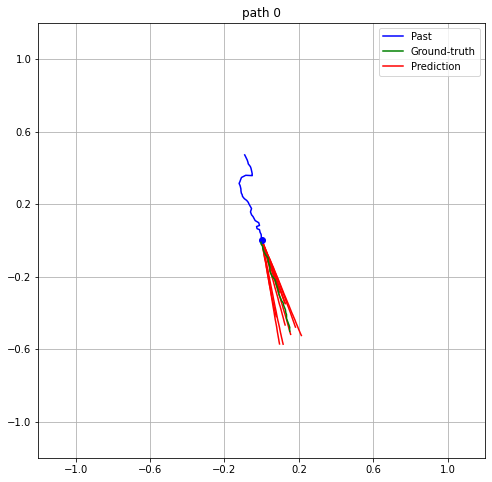

In [4]:
reload(visualization)
reload(model_path)
visualization.draw_path_batch(x=eval_data[0], ground_truth=eval_data[2], prediction_model=m, rnd=False, samples=10)

In [5]:
predictions = m.prediction_sampling(eval_data[0][0], samples=100)

[<tf.Tensor: shape=(40, 2), dtype=float32, numpy=
array([[ 0.00516153, -0.00955961],
       [ 0.00855924, -0.01807344],
       [ 0.01215325, -0.02681321],
       [ 0.01608839, -0.03575854],
       [ 0.01975555, -0.04498991],
       [ 0.02335325, -0.05424978],
       [ 0.02727493, -0.06347045],
       [ 0.03141614, -0.07273507],
       [ 0.03550337, -0.08188722],
       [ 0.03870502, -0.0913751 ],
       [ 0.04298814, -0.0999476 ],
       [ 0.04675195, -0.1097177 ],
       [ 0.05023533, -0.11870004],
       [ 0.05365866, -0.12777823],
       [ 0.05679372, -0.13653226],
       [ 0.06047893, -0.14555067],
       [ 0.06376062, -0.15504006],
       [ 0.06732081, -0.16428456],
       [ 0.07074594, -0.1735343 ],
       [ 0.07402102, -0.18277523],
       [ 0.07735682, -0.19194545],
       [ 0.08029601, -0.20156616],
       [ 0.08385155, -0.21087132],
       [ 0.08719976, -0.21990745],
       [ 0.09038333, -0.22915855],
       [ 0.09354889, -0.23888926],
       [ 0.09683322, -0.24858525],
     

100 <class 'list'> (40, 2)
1: 0.0000025 0.0000007, 0.0000019
2: 0.0000093 0.0000024, 0.0000069
3: 0.0000202 0.0000052, 0.0000150
4: 0.0000362 0.0000089, 0.0000273
5: 0.0000564 0.0000134, 0.0000430
6: 0.0000807 0.0000190, 0.0000617
7: 0.0001101 0.0000258, 0.0000844
8: 0.0001435 0.0000339, 0.0001096
9: 0.0001814 0.0000430, 0.0001384
10: 0.0002239 0.0000530, 0.0001709
11: 0.0002670 0.0000634, 0.0002036
12: 0.0003186 0.0000752, 0.0002434
13: 0.0003722 0.0000878, 0.0002844
14: 0.0004269 0.0001012, 0.0003256
15: 0.0004869 0.0001158, 0.0003711
16: 0.0005504 0.0001323, 0.0004181
17: 0.0006187 0.0001487, 0.0004700
18: 0.0006906 0.0001664, 0.0005243
19: 0.0007650 0.0001848, 0.0005803
20: 0.0008431 0.0002035, 0.0006396
21: 0.0009216 0.0002228, 0.0006988
22: 0.0010091 0.0002443, 0.0007648
23: 0.0010959 0.0002667, 0.0008292
24: 0.0011856 0.0002903, 0.0008953
25: 0.0012762 0.0003135, 0.0009628
26: 0.0013712 0.0003382, 0.0010330
27: 0.0014684 0.0003646, 0.0011038
28: 0.0015647 0.0003896, 0.0011751
29

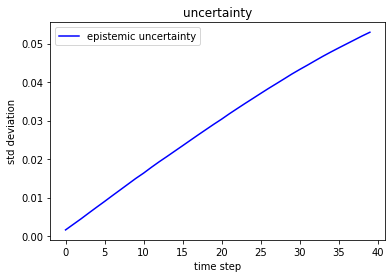

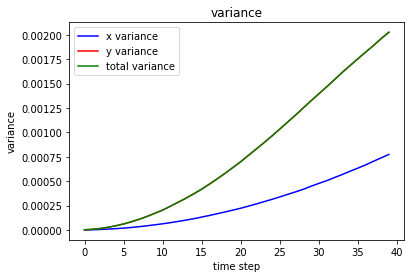

In [6]:
print(len(predictions), type(predictions), predictions[0].shape)

# convert list into single numpy matrix: (sample, time_step, x/y)
unified = np.array(predictions)
output_time_steps = unified.shape[1]

arr_x_var = []
arr_y_var = []
arr_total_var = []
for time_step in range(output_time_steps):
    # calculate variances for x and y for every time step
    x_var = unified[:, time_step, 0].var()
    y_var = unified[:, time_step, 1].var()

    # since x and y are independent random variables, just sum them to get the total
    total_var = x_var + y_var

    arr_x_var.append(x_var)
    arr_y_var.append(y_var)
    arr_total_var.append(total_var)

    print(f"{time_step+1}: {total_var:.7f} {x_var:.7f}, {y_var:.7f}")

arr_total_std = np.sqrt(arr_total_var)
print(arr_total_std)

# std
fig, ax = plt.subplots()
plt.title('uncertainty')
plt.xlabel('time step')
plt.ylabel('std deviation')
plt.plot(arr_total_std, 'b', label='epistemic uncertainty')
ax.legend()
plt.show()

# variances
fig, ax = plt.subplots()
plt.title('variance')
plt.xlabel('time step')
plt.ylabel('variance')
plt.plot(arr_x_var, 'b', label='x variance')
plt.plot(arr_y_var, 'r', label='y variance')
plt.plot(arr_y_var, 'g', label='total variance')
ax.legend()
plt.show()

(4000,) (4000,)


Text(0, 0.5, 'y offset')

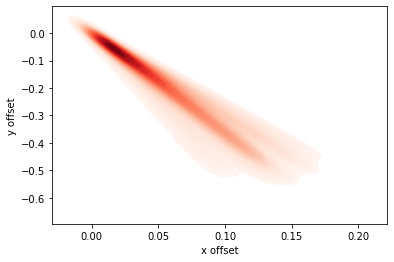

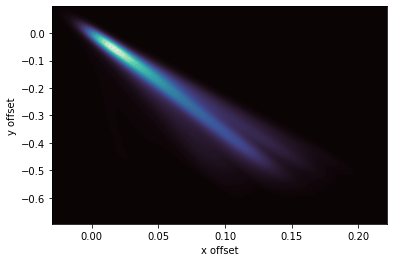

In [53]:
# convert the time-steps into 2D array of just x and y coordinates
unified = np.array(predictions)
# prediction_2d = np.reshape(unified, (unified.shape[0] * unified.shape[1], unified.shape[2]) )

x = unified[:,:,0].flatten()
y = unified[:,:,1].flatten()
print(x.shape, y.shape)
fig, ax = plt.subplots()
fig.set_size_inches(8.0, 8.0)
seaborn.kdeplot(x=x, y=y, cmap="Reds", fill=True, levels=50, gridsize=100)
plt.xlabel('x offset')
plt.ylabel('y offset')

fig, ax = plt.subplots()
fig.set_size_inches(8.0, 8.0)
seaborn.kdeplot(x=x, y=y, cmap="mako", fill=True, levels=100, thresh=0, gridsize=100)
plt.xlabel('x offset')
plt.ylabel('y offset')

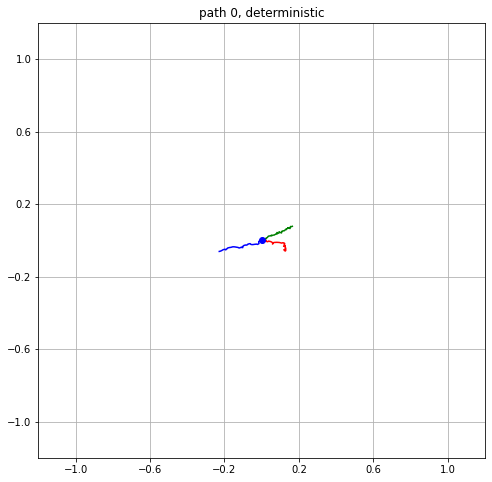

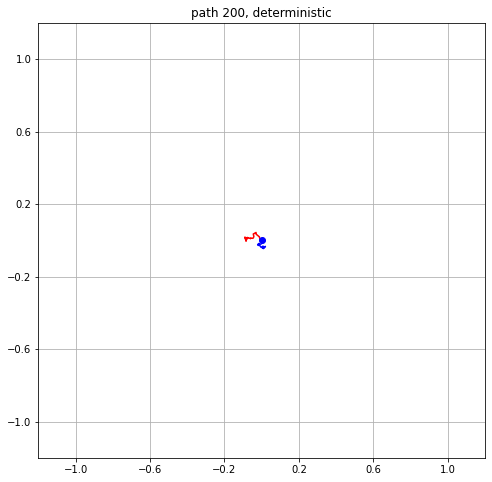

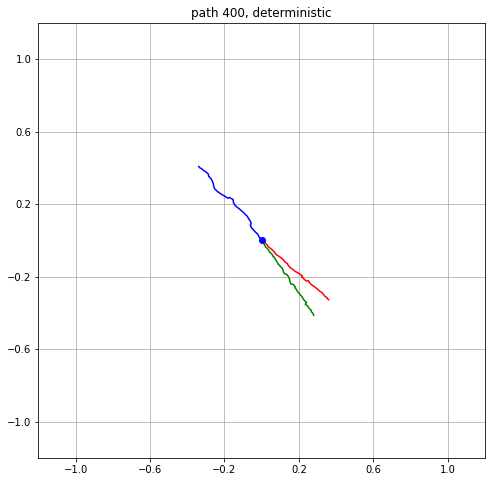

In [7]:
N = 0
multiplier = 200
amount = 3

for i in range(amount):
    n = N + multiplier * i

    x = eval_data[0][n]
    y = eval_data[2][n]

    prediction = m.predict_once(x)
    visualization.draw_path(x, y, predictions=[prediction], name=f"path {n}, deterministic")